In [79]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [80]:
data_ready = pd.read_csv("data_ready.csv")

In [81]:
data_ready[data_ready.select_dtypes(include=['float64']).columns] = data_ready.select_dtypes(include=['float64']).astype("float32")

In [82]:
# 70% training data, 15% validation, 15% test
train_dev, test = train_test_split(data_ready, test_size=0.15, random_state=42)
train, dev = train_test_split(train_dev, test_size=0.176, random_state=42)

In [83]:
# convert to tensors and extract labels

train_label = train.pop("5YR_SURV")
dev_label = dev.pop("5YR_SURV")
test_label = test.pop("5YR_SURV")

train_tf = tf.convert_to_tensor(train)
dev_tf = tf.convert_to_tensor(dev)
test_tf = tf.convert_to_tensor(test)

train_label_tf = tf.convert_to_tensor(train_label)
dev_label_tf = tf.convert_to_tensor(dev_label)
test_label_tf = tf.convert_to_tensor(test_label)

In [111]:
model = tf.keras.Sequential(
    [
       tf.keras.Input(shape=(214,)),
       tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001) name="L1"),
       tf.keras.layers.Dropout(0.3),
       tf.keras.layers.Dense(16, activation="relu", name="L3"),
       tf.keras.layers.Dropout(0.3),
       tf.keras.layers.Dense(1, activation="sigmoid", name="L5") 
    ]
)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3500218250.py, line 4)

In [103]:
from tensorflow.keras import backend as K

# Sensitivity (Recall)
import tensorflow as tf
from tensorflow.keras import backend as K

def sensitivity(y_true, y_pred):
    """
    param:
    y_pred - Predicted labels
    y_true - True labels 
    Returns:
    Specificity score
    """
    pos_y_true = y_true
    pos_y_pred = y_pred
    fn = K.sum(pos_y_true * y_pred)
    tp = K.sum(pos_y_true * pos_y_pred)
    specificity = tp / (tp + fn + K.epsilon())
    
    return sensitivity
# Specificity
def specificity(y_true, y_pred):
    """
    param:
    y_pred - Predicted labels
    y_true - True labels 
    Returns:
    Specificity score
    """
    neg_y_true = 1 - y_true
    neg_y_pred = 1 - y_pred
    fp = K.sum(neg_y_true * y_pred)
    tn = K.sum(neg_y_true * neg_y_pred)
    specificity = tn / (tn + fp + K.epsilon())
    spec_val = specificity
    return specificity

In [108]:
model.compile(
    optimizer=tf.keras.optimizers.Adamax(learning_rate=1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(), 
    metrics=["accuracy", specificity]
)

In [109]:
history = model.fit(train_tf, train_label_tf, epochs=1000, validation_data = (dev_tf, dev_label_tf))

Epoch 1/1000
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7086 - loss: 0.6029 - specificity: 0.3022 - val_accuracy: 0.7119 - val_loss: 0.5853 - val_specificity: 0.2721
Epoch 2/1000
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7239 - loss: 0.5769 - specificity: 0.2833 - val_accuracy: 0.7121 - val_loss: 0.5823 - val_specificity: 0.2799
Epoch 3/1000
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7348 - loss: 0.5664 - specificity: 0.2767 - val_accuracy: 0.7135 - val_loss: 0.5842 - val_specificity: 0.3095
Epoch 4/1000
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7307 - loss: 0.5685 - specificity: 0.2823 - val_accuracy: 0.7130 - val_loss: 0.5828 - val_specificity: 0.3109
Epoch 5/1000
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7294 - loss: 0.5635 - specificity: 0.2822 - val_accuracy: 0.7135 - val_loss: 0.5796 - val_specificity: 0.2812
Epoch 6/1000
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7235 - loss: 0.5709 - specificity: 0.2869 

KeyboardInterrupt: 

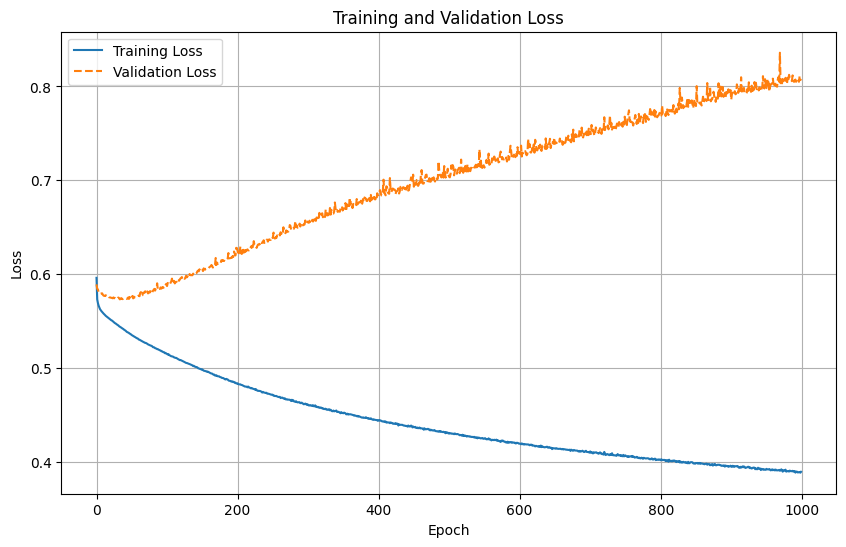

In [110]:
loss_values = history.history['loss']
val_loss_values = history.history.get('val_loss')

# Plot the loss values
plt.figure(figsize=(10, 6))
plt.plot(loss_values, label='Training Loss')
if val_loss_values:
    plt.plot(val_loss_values, label='Validation Loss', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [89]:
model.evaluate(dev_tf, dev_label_tf)

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7162 - loss: 0.5882 - specificity: 0.2693


[0.5949135422706604, 0.7054393291473389, 0.26712945103645325]